In [41]:
import os
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt
import numpy as np
import cv2
import math
import random

In [42]:
DISPLAY = True
SAVE = True
SIZE = (224, 224, 3)

In [43]:
def save_images_to_directory(image_list, directory_path):

    # Ensure the directory exists, and create it if it doesn't
    if not os.path.exists(directory_path):
        os.makedirs(directory_path)

    # Save the specified number of images from the list to the directory
    for i in range(len(image_list)):
        image = image_list[i]
        
        # Ensure that the image data is in uint8 format and that the shape is (height, width, channels)
        if image.dtype != np.uint8:
            image = (255 * image).astype(np.uint8)
        if len(image.shape) == 2:
            image = np.stack((image, image, image), axis=-1)

        image_pil = Image.fromarray(image)  # Convert to PIL Image
        image_pil.save(os.path.join(directory_path, f"image_{i:05d}.png"))

def apply_to(set, function, *param):
    new_set = []

    for s in set:
        new_set += function(s, *param)

    set += new_set

    return set

def display_images(image_list, maxx=1000):
    if not DISPLAY: 
        return
    """
    Display a list of images in a grid with automatically calculated rows and columns.

    Parameters:
    - image_list: List of images (numpy arrays) to display.

    Example:
    display_images([image1, image2, image3, image4, image5, image6, image7, image8, image9, image10])
    """
    num_images = len(image_list)
    if num_images > maxx:
        num_images = maxx
    side_length = int(math.ceil(math.sqrt(num_images)))  # Calculate the square root and round up

    rows = side_length
    columns = side_length

    # If the number of images is not a perfect square, adjust the number of rows and columns
    if rows * columns < num_images:
        rows = side_length
        columns = side_length + 1

    # Create a subplot grid with the calculated number of rows and columns
    fig, axes = plt.subplots(rows, columns, figsize=(15, 15))

    for i in range(num_images):
        ax = axes[i // columns, i % columns]
        ax.imshow(image_list[i])
        ax.axis('off')  # Hide axis labels

    # Hide any remaining empty subplots
    for i in range(num_images, rows * columns):
        ax = axes[i // columns, i % columns]
        ax.axis('off')

    plt.show()

def load_images_from_directory(directory):
    image_list = []
    filenames = sorted(os.listdir(directory))
    for filename in filenames:
        image_path = os.path.join(directory, filename)
        image = Image.open(image_path)
        image_list.append(image)
    return image_list

In [44]:
directories = ['A/', 'B/', 'C/', 'D/', 'E/', 'F/']
path = "./Training/augmentation1/"

image_lists = []

for directory in directories:
    image_list = load_images_from_directory(path + directory)
    image_lists.append(image_list)

In [45]:
def blur_image(image, blur_factor=5):    
    return [cv2.GaussianBlur(image, (blur_factor, blur_factor), 0)]

In [83]:
def draw_line(image, color=(255, 0, 0), thickness=2):
    height, width = image.shape[:2] 
    start = (np.random.randint(0, width), np.random.randint(0, height))
    end   = (np.random.randint(0, width), np.random.randint(0, height))
    return [cv2.line(image, start, end, color, thickness)]

In [113]:
def noise(image, brightness_factor=.5, saturation_factor=1, noise_factor=20):
    
    # Convert the image to the HSV color space
    hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    # Adjust luminosity (brightness)
    hsv_image[:,:,2] = np.clip(hsv_image[:,:,2] + brightness_factor, 0, 255)

    # Adjust saturation
    hsv_image[:,:,1] = np.clip(hsv_image[:,:,1] * saturation_factor, 0, 255)

    # Convert back to BGR color space
    result_image = cv2.cvtColor(hsv_image, cv2.COLOR_HSV2BGR)

    # Add some noise
    noise = np.random.normal(scale=noise_factor, size=result_image.shape)
    noisy_image = np.clip(result_image + noise, 0, 255).astype(np.uint8)

    return [noisy_image]

In [114]:
for image_list in image_lists:
    for i in range(len(image_list)):
        img_np = np.array(image_list[i])
        image_list[i] = Image.fromarray(cv2.resize(img_np, (224, 224)))

In [146]:
Aug_A = []
for im in image_lists[0]:
    Aug_A.append(np.array(im))

In [147]:
aa = Aug_A[:10]

In [148]:
apply_to(aa, noise);

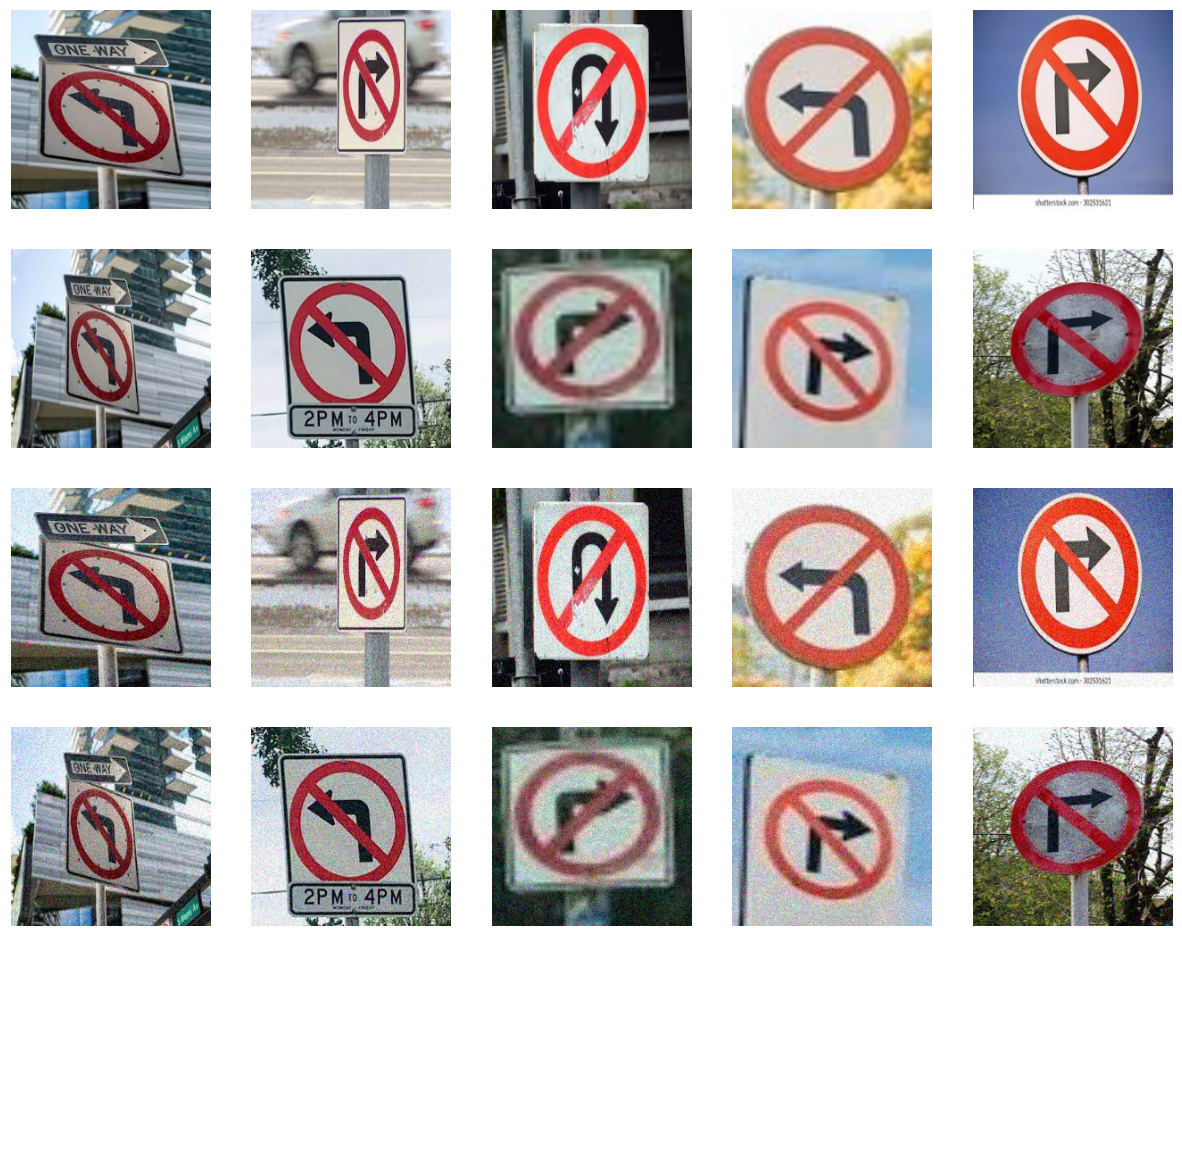

In [149]:
display_images(aa)